# Project4 Analysis of Flights Departure of NYC Airport
### --- Combined with 3 more datasets from two different sources

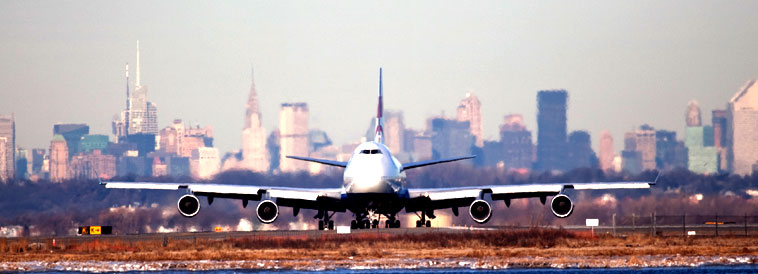

In [1]:
from IPython.display import Image
Image("nyc_flights_0.jpg")

## The Question Design

* <font color=#7D3C98 size=4> Problem Description: </font> Even at the last minute, your vacation plans may go away due to an unforeseen strike or inclement weather, delaying your trip and keeping you from getting somewhere important. Travel Delay Coverage is known as when your travel could be delayed for many reasons, such as inclement weather, mechanical issues with the aircraft, air trafffic delays and many other reasons, then the insruance company will pay a great deal back to the loss of time for your inconvience. So, the insurance companies could make strategies for updating their insurance pricing combining with the possible efffects on the delay to prevent their loss of the liabilities from the advantage data.

<br /> 
* <font color=#7D3C98 size=4> Research Question: What are the possible causes on flights delay? </font> 




## Data Source

* The Data we collected is Flights that Departed NYC in 2013, which contains all flights that departed NYC (i.e. JFK, LGA or EWR) in 2013. Anf we also combine it with other three datasets called airlines, airports and weather.

* Data is collected from RITA, Bureau of transportation statistics and Openflights. Org

* The Bureau of Transportation Statistics data's URL is here: http://www.transtats.bts.gov/DL_SelectFields.asp?Table_ID=236, ,
* The Openflights.Org data data's URL is here: http://openflights.org/data.html

## Explore Data

In [2]:
!ls *.csv

airlines.csv  airports.csv  flights.csv  weather.csv


In [3]:
!wc -l *.csv

      17 airlines.csv
    1459 airports.csv
  336777 flights.csv
   26131 weather.csv
  364384 total


In [4]:
!head -n 3 flights.csv | csvlook

|----+------+-------+-----+----------+----------------+-----------+----------+----------------+-----------+---------+--------+---------+--------+------+----------+----------+------+--------+----------------------|
|    | year | month | day | dep_time | sched_dep_time | dep_delay | arr_time | sched_arr_time | arr_delay | carrier | flight | tailnum | origin | dest | air_time | distance | hour | minute | time_hour            |
|----+------+-------+-----+----------+----------------+-----------+----------+----------------+-----------+---------+--------+---------+--------+------+----------+----------+------+--------+----------------------|
|  1 | 2013 | 1     | 1   | 517      | 515            | 2         | 830      | 819            | 11        | UA      | 1545   | N14228  | EWR    | IAH  | 227      | 1400     | 5    | 15     | 2013-01-01 05:00:00  |
|  2 | 2013 | 1     | 1   | 533      | 529            | 4         | 850      | 830            | 20        | UA      | 1714   | N24211  | LGA    

In [5]:
!head -n 3 airlines.csv | csvlook

|----+---------+-------------------------|
|    | carrier | name                    |
|----+---------+-------------------------|
|  1 | 9E      | Endeavor Air Inc.       |
|  2 | AA      | American Airlines Inc.  |
|----+---------+-------------------------|


In [6]:
!head -n 3 airports.csv | csvlook

|----+-----+-------------------------------+------------+-------------+------+----+-----+-------------------|
|    | faa | name                          | lat        | lon         | alt  | tz | dst | tzone             |
|----+-----+-------------------------------+------------+-------------+------+----+-----+-------------------|
|  1 | 04G | Lansdowne Airport             | 41.1304722 | -80.6195833 | 1044 | -5 | A   | America/New_York  |
|  2 | 06A | Moton Field Municipal Airport | 32.4605722 | -85.6800278 | 264  | -6 | A   | America/Chicago   |
|----+-----+-------------------------------+------------+-------------+------+----+-----+-------------------|


In [7]:
!head -n 3 weather.csv | csvlook

|----+--------+------+-------+-----+------+-------+-------+-------+----------+------------+---------------+--------+----------+-------+----------------------|
|    | origin | year | month | day | hour | temp  | dewp  | humid | wind_dir | wind_speed | wind_gust     | precip | pressure | visib | time_hour            |
|----+--------+------+-------+-----+------+-------+-------+-------+----------+------------+---------------+--------+----------+-------+----------------------|
|  1 | EWR    | 2013 | 1     | 1   | 0    | 37.04 | 21.92 | 53.97 | 230      | 10.35702   | 11.9186514756 | 0      | 1013.9   | 10    | 2012-12-31 19:00:00  |
|  2 | EWR    | 2013 | 1     | 1   | 1    | 37.04 | 21.92 | 53.97 | 230      | 13.80936   | 15.8915353008 | 0      | 1013     | 10    | 2012-12-31 20:00:00  |
|----+--------+------+-------+-----+------+-------+-------+-------+----------+------------+---------------+--------+----------+-------+----------------------|


## Data Wrangling

First we replace the "NA" values with "" in all the csv files.

In [8]:
!sed -i 's/,NA,/,,/g' weather.csv
!sed -i 's/,NA,/,,/g' flights.csv
!sed -i 's/,NA,/,,/g' airlines.csv
!sed -i 's/,NA,/,,/g' airports.csv

Now we'll load the data.

In [9]:
!cp airlines.csv /tmp/airlines.csv
!cp flights.csv /tmp/flights.csv
!cp airports.csv /tmp/airports.csv
!cp weather.csv /tmp/weather.csv

## Create Schema

---
* Let's look at the schema we created in google drawing

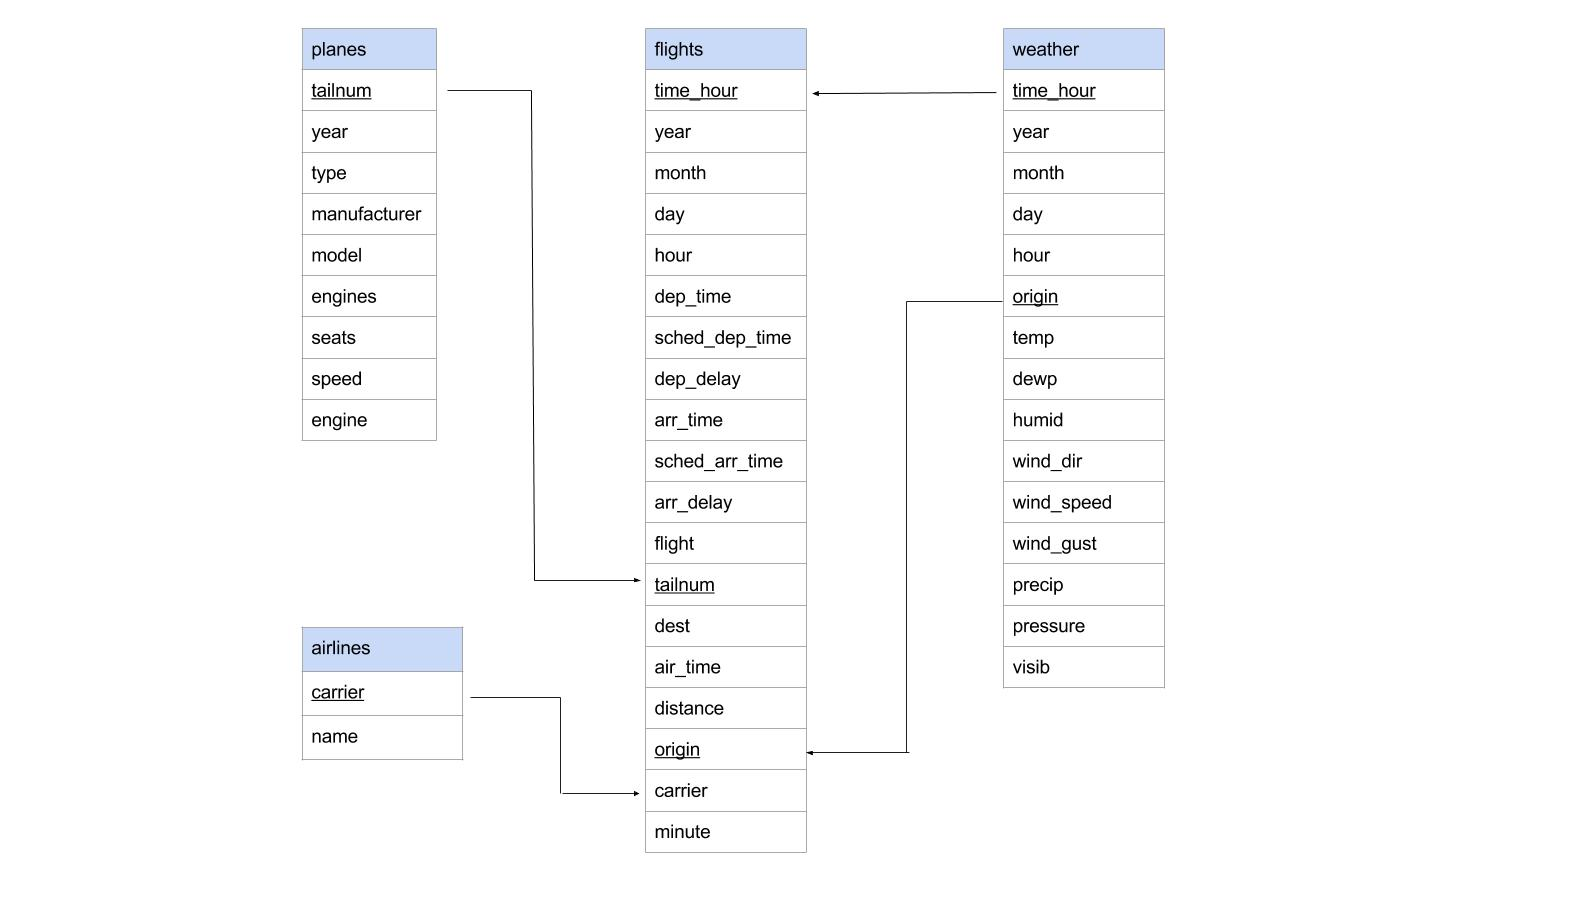

In [10]:
from IPython.display import Image
Image("schema.jpg")

* Here is the code by which we create our schema.

In [1]:
%load_ext sql

In [2]:
!dropdb -U student flightanalysis

dropdb: database removal failed: ERROR:  database "flightanalysis" does not exist


In [3]:
!createdb -U student flightanalysis

In [4]:
%sql postgresql://student@/flightanalysis

'Connected: student@flightanalysis'

In [5]:
%%sql
DROP TABLE if EXISTS flights;

CREATE TABLE flights (
          flights_id INTEGER PRIMARY KEY,
          year CHAR(4),
          month INTEGER,
          day INTEGER,
          dep_time FLOAT,
          sched_dep_time INTEGER,
          dep_delay FLOAT,
          arr_time FLOAT,
          sched_arr_time INTEGER,
          arr_delay FLOAT,
          carrier CHAR(2),
          flight CHAR(4),
          tailnum CHAR(6),
          origin CHAR(3),
          dest CHAR(3),
          air_time FLOAT,
          distance INTEGER,
          hour INTEGER,
          minute INTEGER,
          time_hour TIMESTAMP
        );

Done.
Done.


[]

In [16]:
%%sql
COPY flights FROM '/tmp/flights.csv'
CSV
HEADER;

336776 rows affected.


[]

In [8]:
%%sql
DROP TABLE if EXISTS weather;

CREATE TABLE weather (
          weather_id INTEGER PRIMARY KEY,
          origin CHAR(3),
          year CHAR(4),
          month VARCHAR(2),
          day VARCHAR(2),
          hour VARCHAR(2),
          temp FLOAT,
          dewp FLOAT,
          humid FLOAT,
          wind_dir FLOAT,
          wind_speed FLOAT,
          wind_gust FLOAT,
          precip FLOAT,
          pressure FLOAT,
          visib FLOAT,
          time_hour TIMESTAMP
          );

Done.
Done.


[]

In [18]:
%%sql
COPY weather
FROM '/tmp/weather.csv'
CSV
HEADER;

26130 rows affected.


[]

In [19]:
%%sql
DROP TABLE if EXISTS airlines;

CREATE TABLE airlines (
          airlines_id INTEGER PRIMARY KEY,
          carrier CHAR(2),
          name VARCHAR(100)
          );

Done.
Done.


[]

In [20]:
%%sql
COPY airlines
FROM '/tmp/airlines.csv'
CSV
HEADER;

16 rows affected.


[]

In [21]:
%%sql
DROP TABLE if EXISTS airports;

CREATE TABLE airports (
          airports_id INTEGER PRIMARY KEY,
          faa CHAR(3),
          name VARCHAR(100),
          lat FLOAT,
          lon FLOAT,
          alt INTEGER,
          tz INTEGER,
          dst CHAR(1),
          tzone VARCHAR(100)
          );

Done.
Done.


[]

In [22]:
%%sql
COPY airports
FROM '/tmp/airports.csv'
CSV
HEADER;

1458 rows affected.


[]

## Data Analysis

In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [24]:
import psycopg2
conn = psycopg2.connect("dbname='flightanalysis' user='student'")
cur = conn.cursor()

* Take 30 miniutes as a boundary for long delayed flights，let us explore the weather data for the Departure delays which is over 30 minnutes.

In [25]:
conn = psycopg2.connect("dbname='flightanalysis' user='student'")
cur = conn.cursor()
cur.execute('''
                SELECT weather.temp,weather.humid,weather.wind_speed,weather.precip
                FROM flights
                LEFT OUTER JOIN weather
                ON flights.time_hour = weather.time_hour
                WHERE flights.dep_delay > 30
               ''')
rows=cur.fetchall()
temp=[]
humidity=[]
windspeed=[]
precipitation=[]
for n in rows:
    try:
        temp.append(float(n[0]))
    except:
        print(n)
for n in rows:
    try:
        humidity.append(float(n[1]))
    except:
        print(n)
for n in rows:
    try:
        windspeed.append(float(n[2]))
    except:
        print(n)
for n in rows:
    try:
        precipitation.append(float(n[3]))
    except:
        print(n)

(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, 12.65858, 0.03)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None,

(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


In [26]:
print(len(temp))
print(len(humidity))
print(len(windspeed))
print(len(precipitation))

144021
144021
144023
144029


### Weather

* Now we plot the weather attribute -- Temperature,Humidity,Windspeed,Precipitation for Departure delays which is over 30 minnutes.

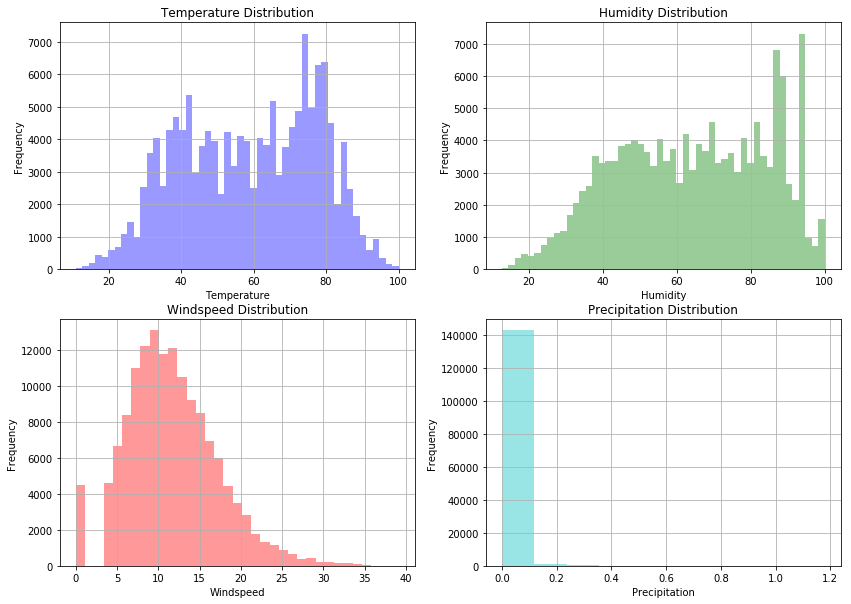

In [27]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.hist(temp,50,color="b",alpha=0.4)
#plt.axis([0, 120, 0, 1500])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.grid(True)

plt.subplot(222)
plt.hist(humidity,50,color="g",alpha=0.4)
#plt.axis([0, 120, 0, 1500])
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distribution")
plt.grid(True)

plt.subplot(223)
plt.hist(windspeed,35,color="r",alpha=0.4)
#plt.axis([0, 40, 0, 3000])
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.title("Windspeed Distribution")
plt.grid(True)

plt.subplot(224)
plt.hist(precipitation,10,color="c",alpha=0.4)
#plt.axis([0, 1, 0, 30000])
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.title("Precipitation Distribution")
plt.grid(True)

* And we do the same thing to explore the weather data for Departure delays which is equal or less than 30 minnutes.

In [28]:
conn = psycopg2.connect("dbname='flightanalysis' user='student'")
cur = conn.cursor()
cur.execute('''
                SELECT weather.temp,weather.humid,weather.wind_speed,weather.precip
                FROM flights
                LEFT OUTER JOIN weather
                ON flights.time_hour = weather.time_hour
                WHERE flights.dep_delay < 30
               ''')
rows=cur.fetchall()
temp=[]
humidity=[]
windspeed=[]
precipitation=[]
for n in rows:
    try:
        temp.append(float(n[0]))
    except:
        print(n)
for n in rows:
    try:
        humidity.append(float(n[1]))
    except:
        print(n)
for n in rows:
    try:
        windspeed.append(float(n[2]))
    except:
        print(n)
for n in rows:
    try:
        precipitation.append(float(n[3]))
    except:
        print(n)

(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)
(None, None, None, None)


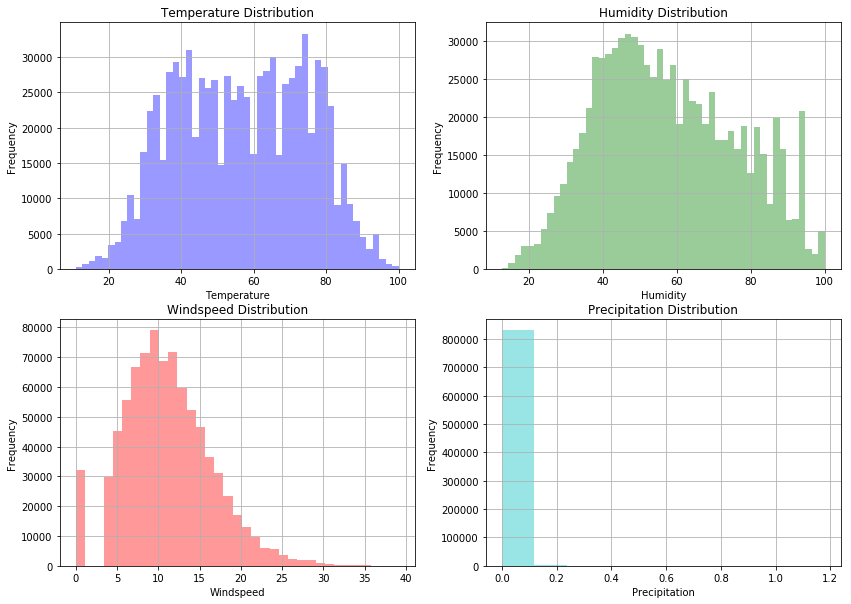

In [29]:
plt.figure(figsize=(14,10))

plt.subplot(221)
plt.hist(temp,50,color="b",alpha=0.4)
#plt.axis([0, 120, 0, 1500])
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title("Temperature Distribution")
plt.grid(True)

plt.subplot(222)
plt.hist(humidity,50,color="g",alpha=0.4)
#plt.axis([0, 120, 0, 1500])
plt.xlabel("Humidity")
plt.ylabel("Frequency")
plt.title("Humidity Distribution")
plt.grid(True)

plt.subplot(223)
plt.hist(windspeed,35,color="r",alpha=0.4)
#plt.axis([0, 40, 0, 3000])
plt.xlabel("Windspeed")
plt.ylabel("Frequency")
plt.title("Windspeed Distribution")
plt.grid(True)

plt.subplot(224)
plt.hist(precipitation,10,color="c",alpha=0.4)
#plt.axis([0, 1, 0, 30000])
plt.xlabel("Precipitation")
plt.ylabel("Frequency")
plt.title("Precipitation Distribution")
plt.grid(True)

* By comparing the weather data for Departure delays which is over 30 minutes and that which is equal or lower than 30 minutes, we found that:
### There are Extreme values  of humidity (a peak in 90) and temperature (a peak in 80) in long delayed flights

---
* Next, we are going to explore the distribution for all the Departure delays data from flights dataset.

In [30]:
queries='''
SELECT dep_delay
FROM flights
WHERE dep_delay IS NOT NULL
'''
cur.execute(queries)
rows = cur.fetchall()
mylist=[]
for r in rows:
    mylist.append(r[0])
conn.commit()

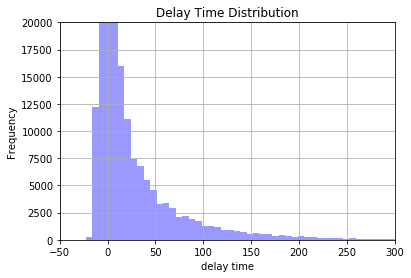

In [31]:
plt.hist(mylist,200,color="b",alpha=0.4)
plt.xlabel("delay time")
plt.ylabel("Frequency")
plt.axis([-50, 300, 0, 20000])
plt.title("Delay Time Distribution")
plt.grid(True)

In [32]:
p=list(range(0,100,5))
pd.DataFrame(np.percentile(mylist,p),p, columns=['percentile of delay time'])

,percentile of delay time
0,-43.0
5,-9.0
10,-7.0
15,-6.0
20,-6.0
25,-5.0
30,-4.0
35,-4.0
40,-3.0
45,-2.0


* Here is our findings:
### 85% of the flights were delayed for equal to or lower than 30 minutes,  i.e. 15% of the flights were delayed for more than 30 minutes

---
* Now let us analyse the relationship between visibility and Departure delays more deeply. 

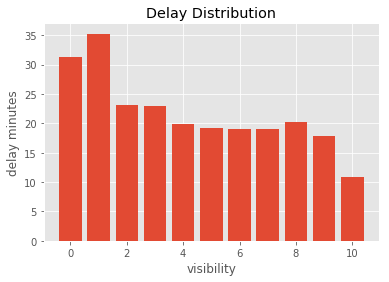

In [33]:
conn = psycopg2.connect("dbname='flightanalysis' user='student'")
cur = conn.cursor()
queries='''
SELECT ROUND(weather.visib), AVG(flights.dep_delay)
FROM flights
LEFT OUTER JOIN weather
ON flights.time_hour = weather.time_hour
WHERE weather.visib IS NOT NULL
GROUP BY ROUND(weather.visib)
'''
cur.execute(queries)
rows = cur.fetchall()
mylist1=[]
mylist2=[]
for r in rows:
    mylist1.append(r[0])
    mylist2.append(r[1])
conn.commit()
plt.style.use("ggplot")
plt.bar(mylist1,mylist2)
plt.xlabel("visibility")
plt.ylabel("delay minutes")
plt.title("Delay Distribution")
plt.grid(True)

* findings:
### Lower the visibility, longer the average delayed time

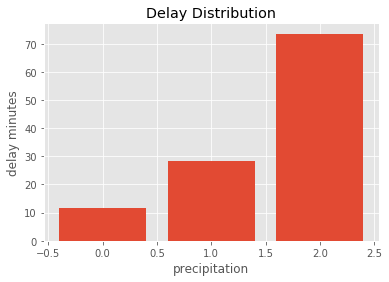

In [34]:
conn = psycopg2.connect("dbname='flightanalysis' user='student'")
cur = conn.cursor()
queries='''
SELECT CEILING(weather.precip), AVG(flights.dep_delay)
FROM flights
LEFT OUTER JOIN weather
ON flights.time_hour = weather.time_hour
WHERE weather.visib IS NOT NULL
GROUP BY CEILING(weather.precip)
'''
cur.execute(queries)
rows = cur.fetchall()
mylist1=[]
mylist2=[]
for r in rows:
    mylist1.append(r[0])
    mylist2.append(r[1])
conn.commit()
plt.style.use("ggplot")
plt.bar(mylist1,mylist2)
plt.xlabel("precipitation")
plt.ylabel("delay minutes")
plt.title("Delay Distribution")
plt.grid(True)

* findings:
### More serious the precipitation (rain or snow), longer the average delayed time

### Time

* Let us see the patterns according to change in time. First, let us focus on departure delays for each hour of a day.

In [37]:
%%sql
SELECT TO_CHAR(time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
WHERE dep_delay IS NOT NULL
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,0.687757201646091
06,1.64279558097626
07,1.91407775608024
08,4.12794776119403
09,4.58373780335251
10,6.49829455475697
11,7.19165025100083
12,8.6148485359411
13,11.4376504327342
14,13.8188741721854


In [38]:
%matplotlib inline

<Container object of 19 artists>

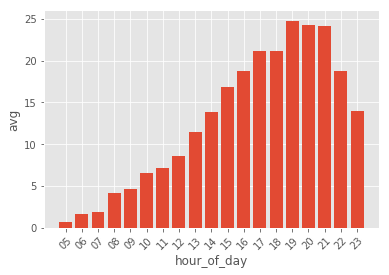

In [39]:
_.bar()

* Let us see the pattern of departure delays for each day of a week.

In [40]:
%%sql
SELECT TO_CHAR(time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
WHERE dep_delay IS NOT NULL
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,14.6960574948665
Monday,14.7789367293309
Saturday,7.65050233367613
Sunday,11.5895318011524
Thursday,16.1489199909571
Tuesday,10.6316825654557
Wednesday,11.8035122190839


<Container object of 7 artists>

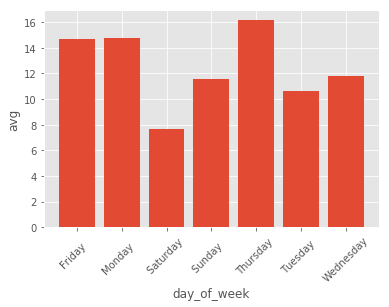

In [41]:
_.bar()

* Let us see the pattern of departure delays for each day of a month.

In [42]:
%%sql
SELECT TO_CHAR(time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
WHERE arr_delay IS NOT NULL
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

31 rows affected.


day_of_month,avg
01,14.1349088202456
02,14.0883694412771
03,10.7553748870822
04,5.75851675952142
05,7.79903855217268
06,6.96344988344988
07,14.1693525586655
08,21.6011835467598
09,14.5752125891897
10,17.9740908234407


<Container object of 31 artists>

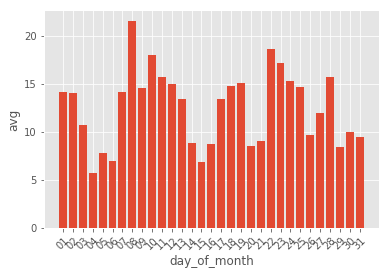

In [43]:
_.bar()

* Let us see the pattern of departure delays for each quarter of a year.

In [44]:
%%sql
SELECT TO_CHAR(time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
WHERE dep_delay IS NOT NULL
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,11.4152099915543
2,15.8782254087021
3,13.7949744221296
4,9.36312471315732


<Container object of 4 artists>

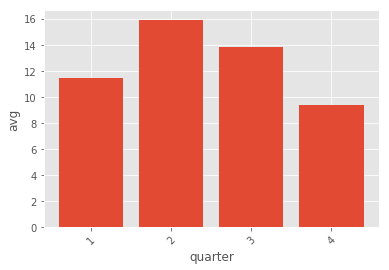

In [45]:
_.bar()

### Controlling weather

* Based on the previous exploration on weather related attributes, the visibility and the precipitation appear to have significant effects on departure delays. Now we hold each of these two attributes constant to see if the patterns of departure delays according to change in time maintain.
* We categorize visibility into three groups: equal to 0, between 0 and 1, and greater than 1. We also categorize precipitation into three groups: less than 4, between 4 and 7, and greater than 7.
* First let us control visibility.

In [22]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib <4)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,5.22340425531915
06,3.92433537832311
07,5.79895561357702
08,13.2810755961441
09,15.7665684830633
10,21.4543726235741
11,18.2312138728324
12,22.9704016913319
13,25.0947467166979
14,28.257217847769


<Container object of 19 artists>

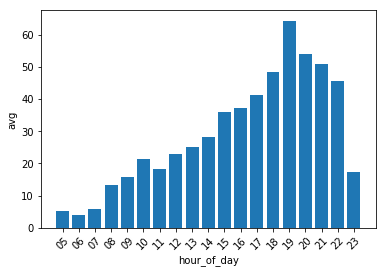

In [23]:
_.bar()

In [30]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib >=4 AND weather.visib<=7)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,1.98757763975155
06,2.23946886446886
07,2.06697819314642
08,4.0056657223796
09,5.8698175787728
10,9.22160356347439
11,18.1837016574586
12,17.8741794310722
13,27.8529100529101
14,30.9278252611586


<Container object of 19 artists>

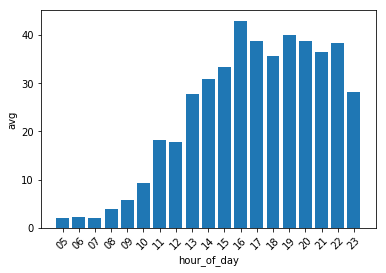

In [31]:
_.bar()

In [32]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib >7)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,0.305175490779298
06,1.42199852914139
07,1.57658321060383
08,3.35177656001414
09,3.60717576595255
10,5.23003617139677
11,5.95881185311215
12,7.23660854786933
13,9.7065796254939
14,12.01255695666


<Container object of 19 artists>

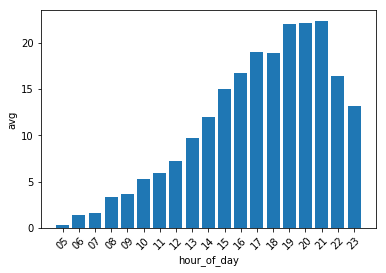

In [33]:
_.bar()

In [24]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib <4 )
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,36.6208651399491
Monday,30.1426038500507
Saturday,15.735368956743
Sunday,22.9196658097686
Thursday,32.764263322884
Tuesday,19.2925011644155
Wednesday,20.6110154905336


<Container object of 7 artists>

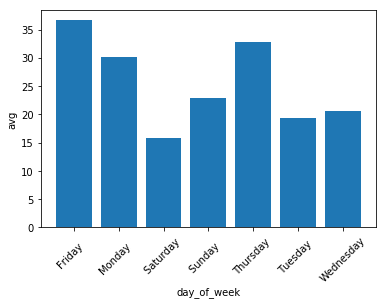

In [25]:
_.bar()

In [34]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib >=4 AND weather.visib <=7)
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,24.2397203947368
Monday,24.5679049034175
Saturday,13.2063829787234
Sunday,20.108
Thursday,30.3928186714542
Tuesday,12.7696955050749
Wednesday,18.7144298688194


<Container object of 7 artists>

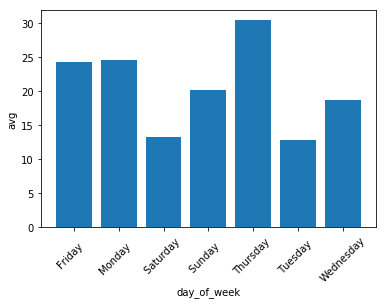

In [35]:
_.bar()

In [36]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib >7 )
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,12.7577505074737
Monday,12.5180000477772
Saturday,6.98965086194366
Sunday,10.3593830460263
Thursday,14.4997733556956
Tuesday,10.0536629341431
Wednesday,10.8683829444891


<Container object of 7 artists>

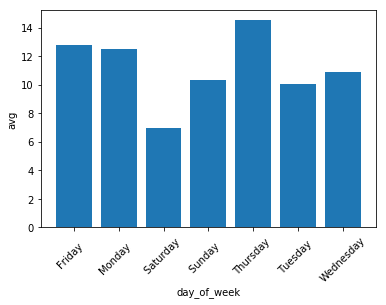

In [37]:
_.bar()

In [26]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib<4)
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

29 rows affected.


day_of_month,avg
01,41.103550295858
02,8.51408450704225
03,13.3062200956938
05,32.9958506224066
06,3.50606060606061
07,31.4806687565308
08,41.6642599277978
09,20.3744444444444
10,37.9093799682035
11,38.8085351787774


<Container object of 29 artists>

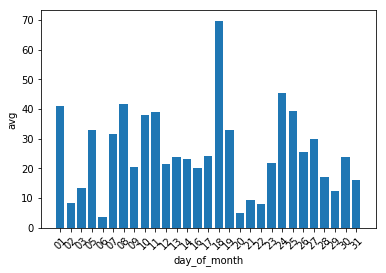

In [27]:
_.bar()

In [38]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib>=4 AND weather.visib<=7)
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

31 rows affected.


day_of_month,avg
01,28.5596919127086
02,26.5859938208033
03,11.6673913043478
04,4.99407407407407
05,17.0241433021807
06,9.83066792097836
07,22.3385416666667
08,44.6455445544554
09,13.0545851528384
10,27.5971563981043


<Container object of 31 artists>

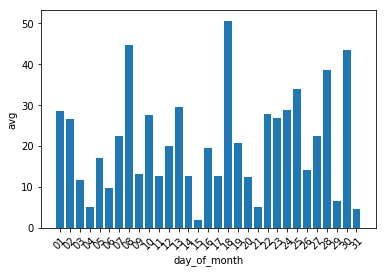

In [39]:
_.bar()

In [40]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib>7)
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

31 rows affected.


day_of_month,avg
01,12.0729866639099
02,12.8336378291241
03,10.6707746478873
04,5.84146341463415
05,5.1193322806226
06,6.91061946902655
07,12.0387562951609
08,17.9139292663386
09,14.147428699753
10,16.3685047720042


<Container object of 31 artists>

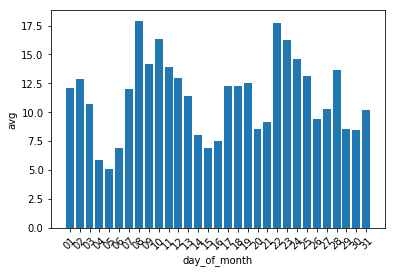

In [41]:
_.bar()

In [28]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib<4)
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,27.9111799217731
2,28.0579543273844
3,24.025974025974
4,22.6521560574949


<Container object of 4 artists>

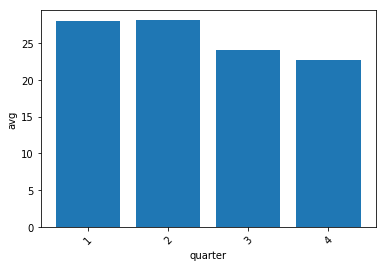

In [29]:
_.bar()

In [42]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib>=4 AND weather.visib<=7)
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,14.2591186664466
2,29.0509900990099
3,29.3015021459227
4,14.8770014556041


<Container object of 4 artists>

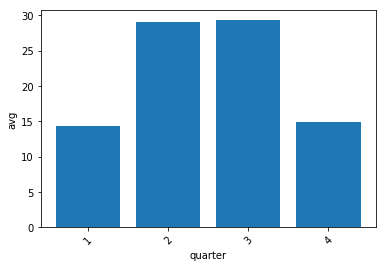

In [43]:
_.bar()

In [44]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.visib>7)
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,9.61789690846758
2,14.2985755680126
3,12.8076369421926
4,8.03400185388051


<Container object of 4 artists>

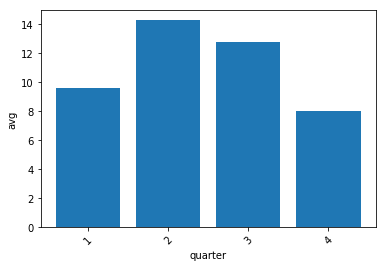

In [45]:
_.bar()

* Now let us control preciptitaion.

In [46]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip =0)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,0.499728113104948
06,1.49238473636288
07,1.71307562710595
08,3.70688770475627
09,3.91014877789586
10,5.59174371662977
11,6.22630363932645
12,7.66750932948116
13,10.3522295757839
14,12.9130193626462


<Container object of 19 artists>

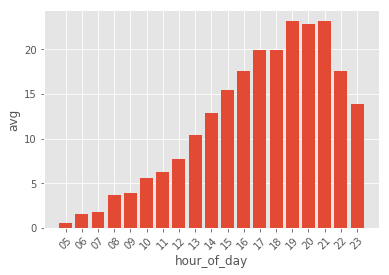

In [47]:
_.bar()

In [47]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip >0 AND weather.precip<=1)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

19 rows affected.


hour_of_day,avg
05,4.17525773195876
06,4.43855421686747
07,5.65698729582577
08,12.0050651230101
09,15.826714801444
10,20.8264462809917
11,22.0155118924509
12,22.6363636363636
13,28.9862340216323
14,28.6744749596123


<Container object of 19 artists>

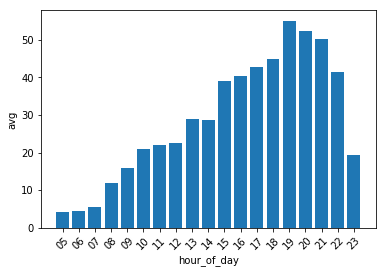

In [48]:
_.bar()

In [49]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'HH24') AS hour_of_day, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip >1)
GROUP BY hour_of_day
ORDER BY hour_of_day ASC
;

1 rows affected.


hour_of_day,avg
13,98.5217391304348


* It seems to be a special event that the precipitation is greater than 1. So we are not going to draw a graph for it and we will ignore this group in the following descriptive analysis.

* We control precipitation to see the pattern of Departure delays for each day of a week.

In [16]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip =0 )
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,13.4998332703466
Monday,13.2238875154512
Saturday,7.39001117744882
Sunday,11.0836221150144
Thursday,14.8441201307841
Tuesday,9.87586605080831
Wednesday,11.1502208818282


<Container object of 7 artists>

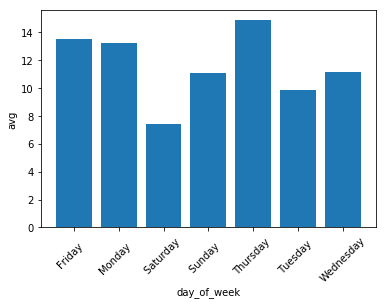

In [17]:
_.bar()

In [50]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Day') AS day_of_week, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip >0 AND weather.precip<=1)
GROUP BY day_of_week
ORDER BY day_of_week ASC
;

7 rows affected.


day_of_week,avg
Friday,29.7032657657658
Monday,32.7118863049096
Saturday,16.1777777777778
Sunday,26.5603217158177
Thursday,39.2910737386805
Tuesday,21.5312775330396
Wednesday,28.9699115044248


<Container object of 7 artists>

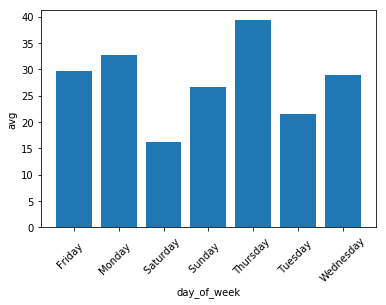

In [51]:
_.bar()

* Then we control precipitation to see the pattern of Departure delays for each day of a month.

In [18]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip =0)
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

31 rows affected.


day_of_month,avg
01,11.6267655013523
02,13.1180732328177
03,10.395372798801
04,5.79842259721203
05,7.78477789304914
06,6.28336816960287
07,12.2871679520137
08,18.5315772427939
09,14.4289519516443
10,16.1508137066613


<Container object of 31 artists>

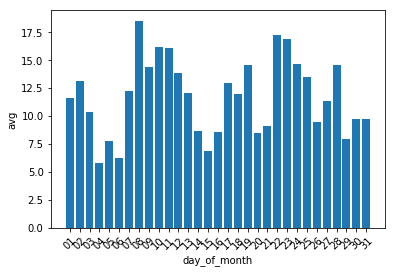

In [19]:
_.bar()

In [52]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'DD') AS day_of_month, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip >0 AND weather.precip<=1)
GROUP BY day_of_month
ORDER BY day_of_month ASC
;

31 rows affected.


day_of_month,avg
01,45.6666666666667
02,61.0441176470588
03,21.2347417840376
04,0.952380952380952
05,21.0
06,16.909217877095
07,28.732531930879
08,49.278748850046
09,18.831013916501
10,44.9173967459324


<Container object of 31 artists>

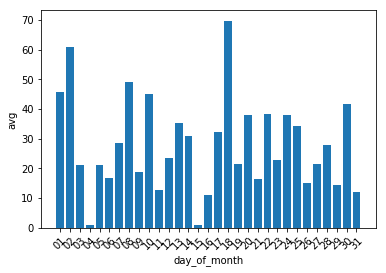

In [53]:
_.bar()

* And we control precipitation to see the pattern of Departure delays for each quarter of a year.

In [20]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip =0)
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,10.2719787772157
2,14.9719812351391
3,12.5980395765093
4,8.82958835393288


<Container object of 4 artists>

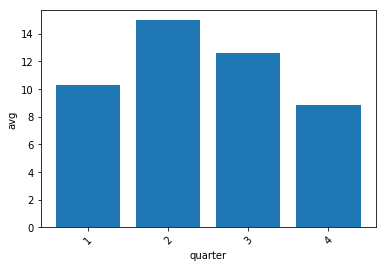

In [21]:
_.bar()

In [54]:
%%sql
SELECT TO_CHAR(flights.time_hour, 'Q') AS quarter, AVG(dep_delay)
FROM flights
JOIN weather
ON (flights.origin=weather.origin AND flights.time_hour=weather.time_hour)
WHERE (dep_delay IS NOT NULL AND weather.precip >0 AND weather.precip<=1)
GROUP BY quarter
ORDER BY quarter ASC
;

4 rows affected.


quarter,avg
1,26.9120223671948
2,29.1864150943396
3,47.3468296409473
4,19.2336492890995


<Container object of 4 artists>

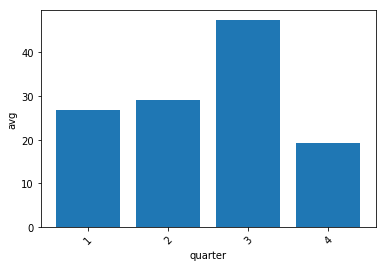

In [55]:
_.bar()

* After compare the unconditional patterns and the conditional patterns according to change in time, we can roughly conclude that:
### Under specific condition of either visibility or precipitation, the patterns due to change in time vary for quarter. 

**For details of different patterns for quarter under different condition of weather, please see the graph below.


**For different days of month, it is hard to tell they have a similar pattern given specific weather condition because there are too many days in a month.


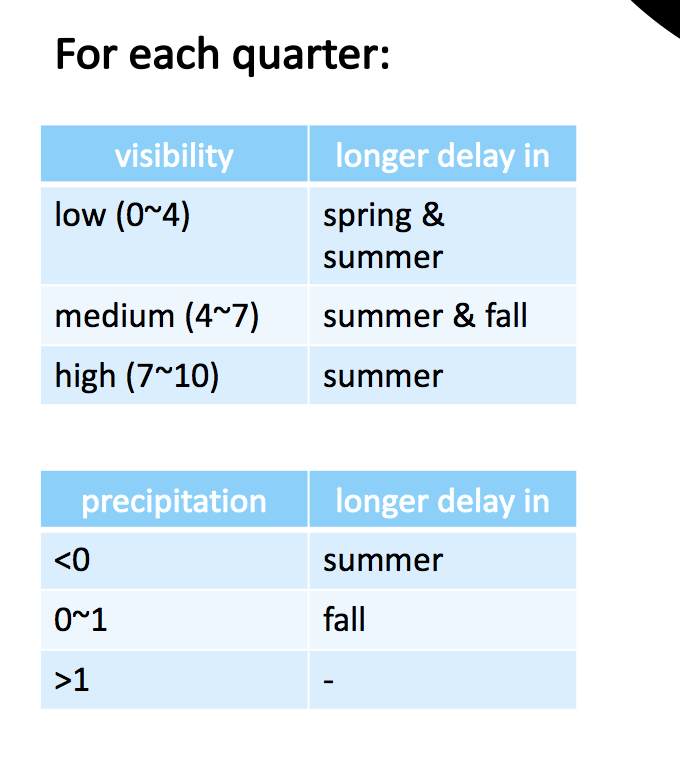

In [46]:
from IPython.display import Image
Image("quarter.png")

* And:
### Under specific condition of either visibility or precipitation, the patterns due to change in time maintain for hour of day and day of week.

* So...you might expect to wait longer if your flight is going to depart around dinner time on a Thursday!

---
# conclusion

* It is reasonable that the insurance company adapt the dynamic pricing strategy, which is to adjust the price of its trip delay insurance according to weather and time.
